# PraUAS  

# Prediksi Kebakaran Hutan Berdasarkan Data Meteorologi


## Pendahuluan  

Kebakaran hutan merupakan bencana ekologis yang serius, menyebabkan kerusakan lingkungan yang luas, kerugian ekonomi yang signifikan, dan ancaman terhadap keanekaragaman hayati serta kehidupan manusia. Memprediksi luas area terbakar akibat kebakaran hutan adalah langkah krusial dalam upaya mitigasi dan penanggulangan bencana. Dengan model prediksi yang akurat, pihak berwenang dapat mengalokasikan sumber daya secara lebih efektif, merencanakan tindakan preventif, dan memberikan peringatan dini kepada masyarakat yang berisiko.

Analisis prediktif ini menggunakan data meteorologi dan indeks dari sistem Fire Weather Index (FWI) untuk memperkirakan luas area yang terbakar. Karakteristik seperti suhu, kelembapan relatif, kecepatan angin, dan beberapa indeks dari sistem FWI menjadi faktor penting yang dianalisis untuk memahami dan memodelkan tingkat keparahan kebakaran hutan.

## Data Understanding  

### Sumber Data  

Dataset yang digunakan dalam analisis ini adalah "Forest Fires Data Set" yang bersumber dari UCI Machine Learning Repository. Data ini dikumpulkan dari wilayah Montesinho, sebuah taman alam yang terletak di timur laut Portugal.  

**Anda dapat menemukan dataset ini pada tautan berikut:**  
https://archive.ics.uci.edu/dataset/162/forest+fires

### Tujuan  

Tujuan utama dari dataset ini adalah untuk mendukung penelitian dalam pengembangan model regresi yang dapat memprediksi luas area hutan yang terbakar. Dengan menggunakan atribut-atribut meteorologi, dataset ini memungkinkan para peneliti dan praktisi untuk membangun sistem prediksi yang dapat membantu dalam manajemen dan pencegahan kebakaran hutan.



### Integrasi Data  

Untuk mengambil dan mengolah data dari UCI Machine Learning Repository, kita perlu menginstal package khusus yang memfasilitasi proses tersebut. Instalasi ini memungkinkan kita untuk menarik dataset langsung dari repositori ke dalam lingkungan kerja kita di Python.  

Perintah untuk mengambil data dapat ditemukan pada halaman dataset di situs UCI dengan menekan tombol "Import in Python". Ikuti petunjuk yang diberikan untuk memastikan data dapat diimpor dengan benar. Contoh pengambilan data "Forest Fires" dapat dilihat pada gambar dan cuplikan kode di bawah ini.



In [1]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
forest_fires = fetch_ucirepo(id=162) 
  
# data (as pandas dataframes) 
X = forest_fires.data.features 
y = forest_fires.data.targets 

## data (as pandas dataframes) 
data = forest_fires.data.features 
  # menyimpan hasil komputasi ke dalam csv
data.to_csv("forest_fires.csv", index=True)
# metadata 
print(forest_fires.metadata) 
  
# variable information 
print(forest_fires.variables) 

print(data.info()) #untuk menampilkan info fitur-fitur yang ada di tabel

print(data.head()) #untuk menampilkan 5 baris pertama


{'uci_id': 162, 'name': 'Forest Fires', 'repository_url': 'https://archive.ics.uci.edu/dataset/162/forest+fires', 'data_url': 'https://archive.ics.uci.edu/static/public/162/data.csv', 'abstract': 'This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data (see details at: http://www.dsi.uminho.pt/~pcortez/forestfires).', 'area': 'Climate and Environment', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 517, 'num_features': 12, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['area'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5D88D', 'creators': ['Paulo Cortez', 'Anbal Morais'], 'intro_paper': {'ID': 368, 'type': 'NATIVE', 'title': 'A data mining approach to predict forest fires using meteorological da

## Eksplorasi Data  

### Visualisasi Data

In [3]:
display(data) #display dataset

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [4]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Import library yang diperlukan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# Mengambil dataset forest fires
forest_fires = fetch_ucirepo(id=162)

# Menggabungkan fitur dan target ke dalam satu DataFrame
data = pd.concat([forest_fires.data.features, forest_fires.data.targets], axis=1)

# Mengganti nama kolom target (kolom terakhir) menjadi 'area'
data.rename(columns={data.columns[-1]: 'area'}, inplace=True)

# Menampilkan 5 baris pertama data untuk memastikan semuanya benar
print(data.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


C:\Users\acer\AppData\Local\Temp\ipykernel_31324\1453521144.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=data, palette='viridis', order=month_order)


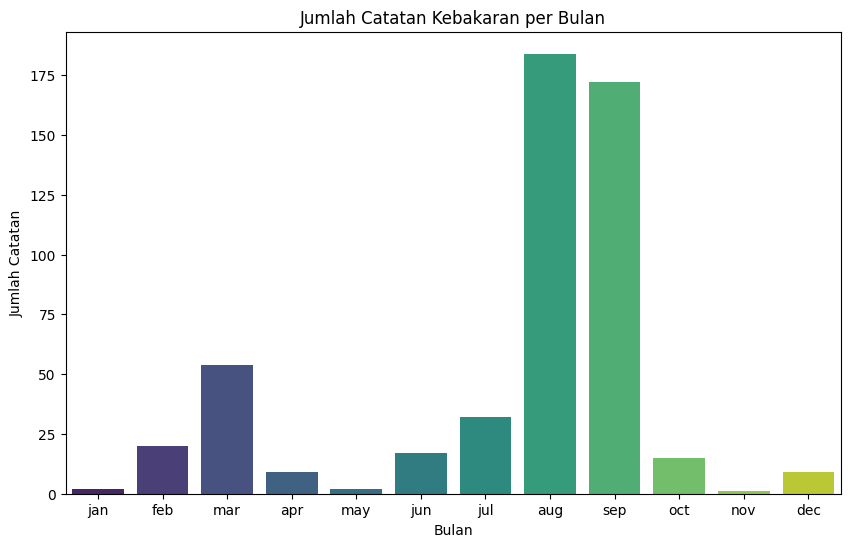

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur urutan bulan agar plot lebih rapi
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=data, palette='viridis', order=month_order)
plt.title('Jumlah Catatan Kebakaran per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Catatan')
plt.show()

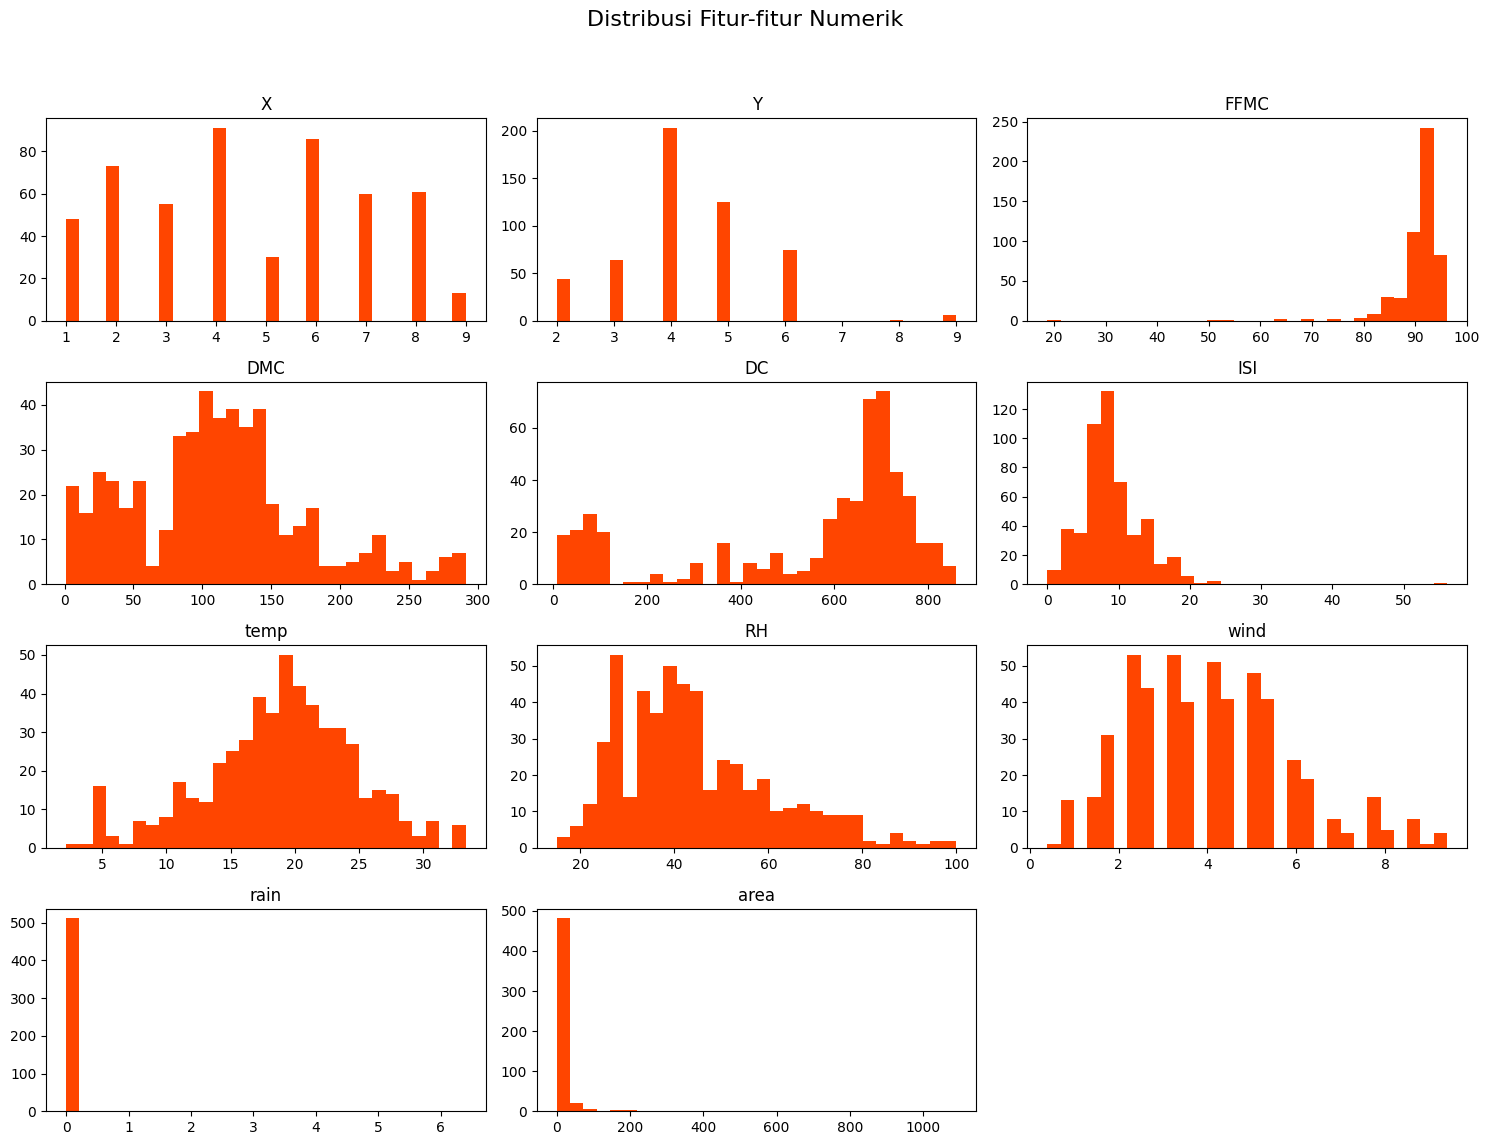

In [7]:
# Visualisasi distribusi semua fitur numerik dengan histogram
# Kita memilih kolom numerik saja untuk di-plot
numeric_data = data.select_dtypes(include=['float64', 'int64'])

numeric_data.hist(bins=30, figsize=(15, 12), color='orangered', grid=False)
plt.suptitle('Distribusi Fitur-fitur Numerik', x=0.5, y=0.95, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.92]) # Menyesuaikan layout agar suptitle tidak tumpang tindih
plt.show()

## Struktur Dataset

### Fitur dan Label

In [8]:
data.shape #untuk mengetahui bentuk dataset(baris & kolom)

(517, 13)

Terdapat 517 baris dan 3 kolom.

In [9]:
data.columns #untuk mengetahui kolom-kolom yang ada pada dataset

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

Fitur adalah atribut atau variabel independen dalam dataset yang digunakan untuk membuat prediksi. Terdapat 12 fitur pada dataset ini:  

- X: Koordinat spasial sumbu-x di dalam peta taman Montesinho.
- Y: Koordinat spasial sumbu-y di dalam peta taman Montesinho.
- month: Bulan kejadian kebakaran (januari hingga desember).
- day: Hari kejadian kebakaran (senin hingga minggu).
- FFMC: Fine Fuel Moisture Code, indeks dari sistem FWI yang mengukur tingkat kelembapan bahan bakar halus (misalnya daun kering, rumput).
- DMC: Duff Moisture Code, indeks dari sistem FWI yang mengukur tingkat kelembapan lapisan humus organik di bawah permukaan.
- DC: Drought Code, indeks dari sistem FWI yang mengukur tingkat kekeringan bahan bakar organik yang lebih dalam.
- ISI: Initial Spread Index, indeks dari sistem FWI yang mengukur kecepatan penyebaran api yang diprediksi.
- temp: Temperatur atau suhu udara dalam derajat Celsius.
- RH: Kelembapan relatif (Relative Humidity) dalam persen (%).
- wind: Kecepatan angin dalam km/jam.
- rain: Curah hujan dalam mm/m².

Label adalah variabel dependen atau target yang ingin diprediksi. Label pada dataset ini bersifat numerik (regresi). 
 
- area: Luas area hutan yang terbakar, dalam hektar (ha). Ini adalah nilai yang akan kita coba prediksi.

In [10]:
# untuk mengetahui tipe data dari masing-masing kolom
data.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

Penjelasan Tipe Data:  

- X, Y (Numerik / Kategorikal Ordinal): Koordinat spasial (1-9).
- month (Kategorikal Nominal): Nama bulan dalam setahun.
- day (Kategorikal Nominal): Nama hari dalam seminggu.
- FFMC (Numerik): Indeks kelembapan bahan bakar halus.
- DMC (Numerik): Indeks kelembapan lapisan humus.
- DC (Numerik): Indeks kekeringan.
- ISI (Numerik): Indeks kecepatan penyebaran api.
- temp (Numerik): Suhu dalam Celsius.
- RH (Numerik): Kelembapan relatif dalam %.
- wind (Numerik): Kecepatan angin dalam km/jam.
- rain (Numerik): Curah hujan dalam mm/m².
- area (Numerik - Label): Luas area terbakar dalam hektar.

### Distribusi Kejadian Kebakaran  

Meskipun target kita adalah numerik (area), kita bisa menganalisis berapa banyak kasus di mana kebakaran benar-benar terjadi (area > 0) dibandingkan yang tidak (area == 0). Ini memberikan gambaran tentang keseimbangan data dari sudut pandang klasifikasi (terjadi/tidak terjadi).



In [11]:
# Membuat kolom 'Status_Kebakaran' untuk analisis
data['Status_Kebakaran'] = data['area'].apply(lambda x: 'Terjadi Kebakaran' if x > 0 else 'Tidak Ada Kebakaran')

# Mengetahui jumlah masing-masing kelas
data['Status_Kebakaran'].value_counts()

Status_Kebakaran
Terjadi Kebakaran      270
Tidak Ada Kebakaran    247
Name: count, dtype: int64

Dari total 517 catatan, terdapat 270 kasus di mana terjadi kebakaran (luas area > 0) dan 247 kasus di mana tidak tercatat adanya area yang terbakar. Ini menunjukkan bahwa dataset ini cukup seimbang antara kejadian kebakaran dan non-kebakaran.


## Identifikasi Kualitas Dataset


### Deteksi Missing Value  

Missing value merupakan data yang hilang pada suatu dataset. Hal ini bisa terjadi oleh beberapa faktor, di antaranya adalah :  

- Interviewer recording error terjadi akibat kelalaian petugas pengumpul data (pewawancara), misalnya ada sejumlah pertanyaan yang terlewatkan.
- Respondent inability error terjadi akibat ketidakmampuan responden dalam memberikan jawaban akurat, misalnya karena tidak memahami pertanyaan, bosan atau kelelahan (respondent fatigue) akhirnya responden mengosongkan sejumlah pertanyaan atau berhenti mengisi kuesioner di tengah jalan.
- Unwillingness respondent error terjadi karena responden tidak berkenan memberikan jawaban yang akurat, misalnya pertanyaan soal penghasilan, usia, berat badan, pengalaman melakukan pelanggaran hukum, dll.  

Cara penanganan Missing Values :

- Mengabaikan dan membuang missing data.
- Estimasi parameter.
- Imputasi.

Dalam modul kali ini, kita akan menangani missing values jika ada. Pertama, kita akan melakukan pendeteksian missing values pada masing-masing kolom.

In [12]:
import pandas as pd

# Mendeteksi baris yang memiliki nilai hilang
rows_with_missing = data[data.isnull().any(axis=1)]

# Menampilkan baris dengan nilai yang hilang
print("Baris dengan Missing Values:")
print(rows_with_missing)

# Mendeteksi nilai yang hilang di seluruh dataset
missing_values = data.isnull()

# Menghitung jumlah nilai yang hilang di setiap kolom
missing_counts = missing_values.sum()

# Menampilkan jumlah nilai yang hilang per kolom
print("\nJumlah Missing Value per Kolom:")
print(missing_counts)

Baris dengan Missing Values:
Empty DataFrame
Columns: [X, Y, month, day, FFMC, DMC, DC, ISI, temp, RH, wind, rain, area, Status_Kebakaran]
Index: []

Jumlah Missing Value per Kolom:
X                   0
Y                   0
month               0
day                 0
FFMC                0
DMC                 0
DC                  0
ISI                 0
temp                0
RH                  0
wind                0
rain                0
area                0
Status_Kebakaran    0
dtype: int64


**Analisis Hasil:**  

Berdasarkan proses pengecekan missing value di atas, didapatkan hasil sebagai berikut:  

- Tidak ditemukan adanya baris yang memiliki data hilang (output "Empty DataFrame").
- Setiap kolom memiliki 0 missing value.  

Ini menunjukkan bahwa dataset Forest Fires yang kita gunakan adalah dataset yang lengkap dan bersih dari data yang hilang. Kualitas data yang baik ini menyederhanakan proses selanjutnya, karena kita tidak perlu melakukan imputasi (mengisi data yang hilang) dengan metode seperti Mean atau KNN. Dataset ini siap untuk tahap preprocessing selanjutnya.

## Preprocessing Data  

Preprocessing data adalah tahap krusial dalam pipeline machine learning. Tujuannya adalah untuk membersihkan dan mengubah data mentah ke dalam format yang sesuai untuk diolah oleh model. Tahapan yang akan kita bahas adalah transformasi data dan imputasi missing value.



### Tranformasi Data  

Bagian ini bertujuan untuk menunjukkan bagaimana data label dapat diubah dari format numerik ke format teks (kategorikal) dan sebaliknya. Ini adalah langkah fundamental dalam persiapan data untuk analisis dan pemodelan.  

1. Transformasi dari Numerik ke Teks (0/1 → 'Tidak Ada Kebakaran' / 'Terjadi Kebakaran')  

Pertama, kita akan membuat sebuah kolom numerik sementara (status_numeric) di mana 0 berarti tidak ada kebakaran dan 1 berarti ada kebakaran. Kemudian, kita akan mengubah kolom numerik ini menjadi label teks yang lebih deskriptif.


In [13]:
# Asumsikan 'data' adalah DataFrame forest_fires yang sudah kita siapkan
# dari langkah-langkah sebelumnya.

# 1. Buat kolom status numerik terlebih dahulu sebagai dasar
#    Jika area > 0, status = 1 (Terjadi Kebakaran), jika tidak, status = 0
data['status_numeric'] = data['area'].apply(lambda x: 1 if x > 0 else 0)

# 2. Buat salinan data untuk demonstrasi agar data asli tidak berubah
data_demonstrasi = data.copy()

# 3. Ubah kolom numerik (0, 1) menjadi label Teks
data_demonstrasi['status_label'] = data_demonstrasi['status_numeric'].replace({
    0: 'Tidak Ada Kebakaran', 
    1: 'Terjadi Kebakaran'
})

# Tampilkan 20 baris pertama untuk melihat hasilnya
# Kita sertakan kolom 'area', 'status_numeric', dan 'status_label' untuk perbandingan
print("Hasil Transformasi Numerik ke Teks:")
print(data_demonstrasi[['area', 'status_numeric', 'status_label']].head(20))

Hasil Transformasi Numerik ke Teks:
    area  status_numeric         status_label
0    0.0               0  Tidak Ada Kebakaran
1    0.0               0  Tidak Ada Kebakaran
2    0.0               0  Tidak Ada Kebakaran
3    0.0               0  Tidak Ada Kebakaran
4    0.0               0  Tidak Ada Kebakaran
5    0.0               0  Tidak Ada Kebakaran
6    0.0               0  Tidak Ada Kebakaran
7    0.0               0  Tidak Ada Kebakaran
8    0.0               0  Tidak Ada Kebakaran
9    0.0               0  Tidak Ada Kebakaran
10   0.0               0  Tidak Ada Kebakaran
11   0.0               0  Tidak Ada Kebakaran
12   0.0               0  Tidak Ada Kebakaran
13   0.0               0  Tidak Ada Kebakaran
14   0.0               0  Tidak Ada Kebakaran
15   0.0               0  Tidak Ada Kebakaran
16   0.0               0  Tidak Ada Kebakaran
17   0.0               0  Tidak Ada Kebakaran
18   0.0               0  Tidak Ada Kebakaran
19   0.0               0  Tidak Ada Kebakara

2. Transformasi dari Teks ke Numerik ('Tidak Ada Kebakaran' / 'Terjadi Kebakaran' → 0/1)  

Sekarang, kita akan melakukan proses sebaliknya. Ini adalah langkah yang paling umum dilakukan dalam preprocessing, karena model machine learning memerlukan input numerik. Kita akan mengubah kolom status_label yang berisi teks kembali menjadi angka 0 dan 1.



In [14]:
# Menggunakan DataFrame 'data_demonstrasi' dari langkah sebelumnya

# Mengubah label Teks ('Tidak Ada Kebakaran', 'Terjadi Kebakaran') kembali menjadi Numerik (0, 1)
data_demonstrasi['status_kembali_numerik'] = data_demonstrasi['status_label'].replace({
    'Tidak Ada Kebakaran': 0, 
    'Terjadi Kebakaran': 1
})

# Tampilkan 20 baris pertama untuk melihat hasilnya
# Kita sertakan kolom 'status_label' dan 'status_kembali_numerik' untuk perbandingan
print("Hasil Transformasi Teks ke Numerik:")
print(data_demonstrasi[['status_label', 'status_kembali_numerik']].head(20))

Hasil Transformasi Teks ke Numerik:
           status_label  status_kembali_numerik
0   Tidak Ada Kebakaran                       0
1   Tidak Ada Kebakaran                       0
2   Tidak Ada Kebakaran                       0
3   Tidak Ada Kebakaran                       0
4   Tidak Ada Kebakaran                       0
5   Tidak Ada Kebakaran                       0
6   Tidak Ada Kebakaran                       0
7   Tidak Ada Kebakaran                       0
8   Tidak Ada Kebakaran                       0
9   Tidak Ada Kebakaran                       0
10  Tidak Ada Kebakaran                       0
11  Tidak Ada Kebakaran                       0
12  Tidak Ada Kebakaran                       0
13  Tidak Ada Kebakaran                       0
14  Tidak Ada Kebakaran                       0
15  Tidak Ada Kebakaran                       0
16  Tidak Ada Kebakaran                       0
17  Tidak Ada Kebakaran                       0
18  Tidak Ada Kebakaran                       0
19  

C:\Users\acer\AppData\Local\Temp\ipykernel_31324\1162243235.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_demonstrasi['status_kembali_numerik'] = data_demonstrasi['status_label'].replace({


Demonstrasi ini menunjukkan fleksibilitas dalam mengelola data label, mengubahnya sesuai kebutuhan baik untuk interpretasi manusia (format teks) maupun untuk pemrosesan oleh mesin (format numerik).




### Imputasi Missing Value  

Setelah missing value terdeteksi, kita perlu untuk mengisi data yang kosong agar data dapat digunakan. Ada banyak cara untuk mengisi missing value, antara lain dengan menggunakan metode mean.  

Namun, berdasarkan analisis pada bagian "Identifikasi Kualitas Dataset" sebelumnya, kita telah menemukan bahwa dataset forest_fires ini tidak memiliki missing value sama sekali (semua kolom memiliki 0 nilai yang hilang).  

Oleh karena itu, tahap imputasi data tidak diperlukan untuk dataset ini. Ini merupakan pertanda kualitas data yang baik dan kita dapat langsung melanjutkan ke langkah berikutnya.  

### Menyimpan Dataset Hasil Preprocessing dengan Metode Mean  

Setelah missing value terdeteksi, salah satu cara untuk menanganinya adalah dengan imputasi, yaitu mengisi nilai yang kosong. Metode yang umum digunakan adalah mengisi nilai yang hilang dengan nilai rata-rata (mean) dari kolom tersebut.  

Berikut adalah demonstrasi langkah-langkah untuk melakukan imputasi dengan metode mean pada dataset kita.



In [15]:
# Untuk demonstrasi, kita akan fokus pada kolom-kolom numerik saja
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# 1. Hitung nilai rata-rata (mean) untuk setiap kolom numerik
mean_values = numeric_data.mean()

# 2. Isi nilai yang hilang (jika ada) dengan nilai rata-rata yang sudah dihitung
#    Karena data kita tidak punya nilai hilang, data_filled akan identik dengan numeric_data
data_filled = numeric_data.fillna(mean_values)

print("--- Ini Hasil Perhitungan Mean untuk Setiap Kolom ---")
print(mean_values)
print("")

print("--- Pengecekan Missing Value Setelah Imputasi ---")
print("Jika output di bawah ini semua 'False', berarti sudah tidak ada missing value")
# .isnull() akan menghasilkan DataFrame boolean. Kita tampilkan beberapa baris pertama.
print(data_filled.isnull().head())
print("")

print("--- Pengecekan per Kolom Secara Keseluruhan ---")
# .any() akan memeriksa apakah ada setidaknya satu nilai 'True' (missing) di setiap kolom
print(data_filled.isnull().any())
print("")

# Menghitung kembali jumlah nilai yang hilang untuk konfirmasi akhir
missing_counts = data_filled.isnull().sum()

print("--- Jumlah Final Missing Value per Kolom ---")
print(missing_counts)

--- Ini Hasil Perhitungan Mean untuk Setiap Kolom ---
X                   4.669246
Y                   4.299807
FFMC               90.644681
DMC               110.872340
DC                547.940039
ISI                 9.021663
temp               18.889168
RH                 44.288201
wind                4.017602
rain                0.021663
area               12.847292
status_numeric      0.522244
dtype: float64

--- Pengecekan Missing Value Setelah Imputasi ---
Jika output di bawah ini semua 'False', berarti sudah tidak ada missing value
       X      Y   FFMC    DMC     DC    ISI   temp     RH   wind   rain  \
0  False  False  False  False  False  False  False  False  False  False   
1  False  False  False  False  False  False  False  False  False  False   
2  False  False  False  False  False  False  False  False  False  False   
3  False  False  False  False  False  False  False  False  False  False   
4  False  False  False  False  False  False  False  False  False  False   

   

Analisis Hasil Demonstrasi:  

- Perhitungan Mean: Kode berhasil menghitung nilai rata-rata untuk semua kolom numerik. Nilai-nilai ini yang akan digunakan untuk mengisi data kosong.
- Pengecekan Pasca-Imputasi: Semua hasil pengecekan (.isnull().head(), .isnull().any(), dan .isnull().sum()) menunjukkan False atau 0. Ini mengonfirmasi bahwa setelah proses imputasi, tidak ada lagi nilai yang hilang di dalam dataset data_filled.  

Meskipun dalam kasus forest_fires kita tidak perlu melakukan imputasi, demonstrasi ini menunjukkan bahwa metode data.fillna(data.mean()) adalah cara yang efektif dan sederhana untuk menangani missing value.

### Imputasi Missing Value dengan Metode KNN  

Pada tahapan ini kami akan melakukan imputasi missing value dengan metode KNN dengan perhitungan jarak menggunakan rumus euclidean distance.  

Langkah-langkah KNN:  
. Tentukan jumlah tetangga (K) yang akan digunakan.
2. Hitung jarak dari data yang nilainya hilang ke masing-masing data point lain.
3. Ambil K tetangga terdekat, kemudian gunakan nilai rata-rata (atau modus) dari tetangga tersebut untuk mengisi nilai yang hilang.  
$$
d(x, y) = \sqrt{\sum_{i=1}^{n} (x_{i} - y_{i})^{2}}
$$

Untuk mencari nilai K yang baik, kami akan menggunakan Cross-validation.

**K-Fold Cross Validation**  

K-Fold Cross Validation adalah salah satu teknik populer dalam evaluasi model. Dataset dibagi sebanyak K lipatan. Pada setiap iterasi, satu lipatan akan dipakai sebagai data uji dan sisanya sebagai data latih. Dengan menggunakan cross-validation, kita akan memperoleh hasil evaluasi yang lebih akurat karena model dievaluasi dengan seluruh data.  

1. Menentukan Nilai K Optimal (untuk Klasifikasi)  

Untuk demonstrasi ini, kita akan mencoba membangun model KNeighborsClassifier untuk memprediksi Status_Kebakaran (Terjadi/Tidak Terjadi) dan mencari nilai K terbaik untuk model tersebut.



In [16]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Kita gunakan data yang sudah di-one-hot-encode dari tahap preprocessing
# Pastikan variabel 'data_processed' sudah ada dari langkah sebelumnya
df = data_processed.copy()

# Memisahkan fitur (X) dan label (y)
# Label kita untuk demonstrasi ini adalah 'Status_Kebakaran'
# Kita hapus kolom target asli ('area') dan label teksnya
X = df.drop(['area', 'Status_Kebakaran'], axis=1)
y_text = df['Status_Kebakaran']

# Mengubah label teks menjadi numerik (0 dan 1)
le = LabelEncoder()
y = le.fit_transform(y_text)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membuat list k untuk diuji
k_list = list(range(1, 50, 2))
print(f"Nilai K yang akan diuji = {k_list}")

cv_scores = []
# Melakukan 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Menghitung Misclassification Error (1 - akurasi)
MSE = [1 - x for x in cv_scores]

# Plotting hasil untuk menemukan K optimal
plt.figure(figsize=(15, 8))
plt.title('Mencari Jumlah Tetangga (K) Optimal', fontsize=20, fontweight='bold')
plt.xlabel('Jumlah Tetangga (K)', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.show()

# Menemukan nilai k terbaik dari hasil cross-validation
best_k = k_list[MSE.index(min(MSE))]
print("Jumlah tetangga (K) optimal berdasarkan plot adalah %d." % best_k)

NameError: name 'data_processed' is not defined

Berdasarkan hasil cross-validation pada model klasifikasi, nilai K=3 memberikan error terendah. Kita akan menggunakan nilai ini sebagai parameter n_neighbors untuk KNNImputer kita.



2. Melakukan Imputasi dengan KNNImputer  

Sekarang kita akan melakukan simulasi imputasi.  
1. Kita ambil data numerik asli.
2. Kita buat beberapa nilai hilang secara acak.
3. Kita gunakan KNNImputer dengan k=3 untuk mengisi nilai-nilai yang hilang tersebut.


In [ ]:
import numpy as np
from sklearn.impute import KNNImputer

# Ambil data numerik asli sebelum di-one-hot-encode
df_numeric = data.select_dtypes(include=np.number)

# --- Langkah Hipotetis: Membuat Missing Values ---
print("Data asli (5 baris pertama):")
print(df_numeric.head())

df_missing = df_numeric.copy()
# Secara acak, ubah sekitar 5% data di kolom FFMC dan DMC menjadi NaN (hilang)
for col in ['FFMC', 'DMC']:
    missing_indices = df_missing.sample(frac=0.05, random_state=42).index
    df_missing.loc[missing_indices, col] = np.nan

print("\nJumlah missing values SETELAH dibuat secara sengaja:")
print(df_missing.isnull().sum())
# -----------------------------------------------


# Inisialisasi KNNImputer dengan k=3
imputer = KNNImputer(n_neighbors=3)

# Lakukan imputasi pada data yang sudah kita buat 'kotor'
data_imputed_array = imputer.fit_transform(df_missing)

# Konversi hasil imputasi (numpy array) kembali menjadi DataFrame
data_imputed_df = pd.DataFrame(data_imputed_array, columns=df_numeric.columns)

print("\n--------------------------- Pengecekan Setelah Imputasi ---------------------------")
print("Jumlah missing values setelah diimputasi dengan KNN:")
print(data_imputed_df.isnull().sum())
print("\n--------------------------- Hasil Data yang Sudah Diimputasi ---------------------------")
# Tampilkan beberapa baris yang sebelumnya memiliki nilai hilang untuk melihat hasil imputasi
print("Contoh baris yang nilainya telah diisi kembali oleh KNNImputer:")
print(data_imputed_df.loc[missing_indices].head())

Data asli (5 baris pertama):
   X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  status_numeric
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0               0
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0               0
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0               0
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0               0
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0               0

Jumlah missing values SETELAH dibuat secara sengaja:
X                  0
Y                  0
FFMC              26
DMC               26
DC                 0
ISI                0
temp               0
RH                 0
wind               0
rain               0
area               0
status_numeric     0
dtype: int64

--------------------------- Pengecekan Setelah Imputasi ---------------------------
Jumlah missing values setelah diimputasi dengan KNN:
X                 0
Y                 0
FFMC              

Setelah proses imputasi selesai dan tidak ada lagi missing value, kita dapat menyimpan hasilnya ke dalam file CSV untuk digunakan di tahap pemodelan.



In [ ]:
# Menyimpan dataframe hasil imputasi KNN ke dalam CSV
data_imputed_df.to_csv("forest_fires_knn_imputed.csv", index=False)
print("\nDataset hasil imputasi KNN berhasil disimpan sebagai 'forest_fires_knn_imputed.csv'")


Dataset hasil imputasi KNN berhasil disimpan sebagai 'forest_fires_knn_imputed.csv'


### Normalisasi

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Memuat data yang sudah diproses (hasil dari one-hot encoding)
# Pastikan file 'forest_fires_processed.csv' ada dari langkah sebelumnya
try:
    data = pd.read_csv('forest_fires_processed.csv')
except FileNotFoundError:
    print("File 'forest_fires_processed.csv' tidak ditemukan. Pastikan Anda sudah menjalankan langkah preprocessing sebelumnya.")
    # Jika file tidak ada, kita buat ulang dari 'data_processed' yang mungkin masih ada di memori
    data = data_processed.copy()


# Mengidentifikasi kolom-kolom numerik yang perlu dinormalisasi
# Kita tidak menormalisasi kolom hasil one-hot encoding (karena sudah 0/1) dan target ('area')
numerical_cols = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Menerapkan normalisasi pada kolom-kolom numerik yang dipilih
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Menyimpan data yang telah dinormalisasi ke dalam file CSV baru
data.to_csv("forest_fires_normalized.csv", index=False)

# Menampilkan 5 baris pertama data setelah normalisasi
print("Data setelah Normalisasi (Min-Max Scaling):")
display(data.head())

File 'forest_fires_processed.csv' tidak ditemukan. Pastikan Anda sudah menjalankan langkah preprocessing sebelumnya.
Data setelah Normalisasi (Min-Max Scaling):


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,0.750,0.428571,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,...,False,False,False,False,False,False,False,False,False,False
1,0.750,0.285714,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,...,False,False,True,False,False,False,False,False,True,False
2,0.750,0.285714,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,...,False,False,True,False,False,True,False,False,False,False
3,0.875,0.571429,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,...,False,False,False,False,False,False,False,False,False,False
4,0.875,0.571429,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,...,False,False,False,False,False,False,True,False,False,False


### Pendeteksian Outlier  

Outlier atau pencilan merupakan data pada dataset yang menyimpang secara signifikan dari data lainnya. Mendeteksi outlier adalah langkah penting agar data yang diolah memberikan hasil yang baik pada model yang akan dibuat nantinya. Outlier dapat diidentifikasi dan ditangani dengan beberapa cara, dan yang akan kami gunakan kali ini adalah LOF (Local Outlier Factor).  

Konsep Local Outlier Factor  

Outlier adalah titik data yang berbeda atau jauh dari titik data lainnya. Local Outlier Factor (LOF) adalah algoritma yang mengidentifikasi outlier dengan mempertimbangkan kepadatan lingkungan lokalnya. Ketika suatu titik dianggap sebagai outlier berdasarkan lingkungan sekitarnya, maka titik tersebut disebut local outlier. LOF bekerja dengan baik ketika kepadatan data tidak sama di seluruh kumpulan data.  

Untuk memahami LOF, ada beberapa konsep yang harus dipelajari secara berurutan:  

1. K-distance dan K-neighbors
2. Reachability Distance (RD)
3. Local Reachability Density (LRD)
4. Local Outlier Factor (LOF)  

1. K-distance & K-neighbors  
K-distance dari sebuah titik A, ditulis sebagai $k
text−distance(A)$, adalah jarak antara titik A ke tetangga terdekatnya yang ke-K. Himpunan dari K tetangga terdekat ini disebut $N_k(A)$.  

2. Reachability Distance (RD)  
Jarak Jangkauan (Reachability Distance) dari titik A ke titik B didefinisikan sebagai nilai maksimum antara jarak K-distance dari B dan jarak Eucledian antara A dan B.  

Rumusnya adalah:  
$$RD 
k
​
 (A,B)=max{k-distance(B),d(A,B)}
$$  

Secara sederhana, jika titik A berada sangat dekat dengan B (di dalam K-tetangganya), jarak jangkauannya "didorong" keluar hingga setara dengan K-distance dari B untuk menstabilkan hasil. Jika A jauh, maka digunakan jarak aslinya.  

3. Local Reachability Density (LRD)  
Kepadatan Jangkauan Lokal (LRD) dari sebuah titik A adalah kebalikan dari rata-rata jarak jangkauan dari A ke semua tetangganya di N_k(A). Nilai LRD yang tinggi berarti titik tersebut berada di area yang padat, sedangkan nilai yang rendah berarti titik tersebut berada di area yang lebih renggang.  

Rumusnya adalah:  
$$
LRD_k(A) = \frac{1}{\frac{\sum_{B \in N_k(A)} RD_k(A, B)}{|N_k(A)|}}
$$

4. Local Outlier Factor (LOF)  
Local Outlier Factor (LOF) dari titik A adalah rasio dari rata-rata LRD para tetangganya terhadap LRD dari titik A itu sendiri.  

Rumusnya adalah:  
$$
LOF_k(A) = \frac{\frac{\sum_{B \in N_k(A)} LRD_k(B)}{|N_k(A)|}}{LRD_k(A)}
$$  

Jika LOF ≈ 1, berarti kepadatan titik A mirip dengan tetangganya (titik tersebut adalah inlier).
Jika LOF > 1, berarti kepadatan titik A lebih rendah dari tetangganya (titik tersebut berpotensi menjadi outlier). Semakin tinggi nilai LOF, semakin besar kemungkinan titik tersebut adalah outlier.

**Implementasi LOF untuk Mendeteksi Outlier**

Sekarang kita akan menerapkan algoritma LOF pada dataset forest_fires yang telah dinormalisasi untuk mengidentifikasi data pencilan.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat data yang telah dinormalisasi dari langkah sebelumnya
try:
    data = pd.read_csv('forest_fires_normalized.csv')
except FileNotFoundError:
    print("File 'forest_fires_normalized.csv' tidak ditemukan. Pastikan Anda sudah menjalankan langkah Normalisasi.")
    # Exit atau handle error jika file tidak ada
    exit()

# Untuk deteksi outlier, kita akan menggunakan fitur-fitur numerik utama.
# Kita kecualikan sementara target ('area') dan fitur kategorikal yang sudah di-encode.
features_for_outlier = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
X = data[features_for_outlier]

# Inisialisasi model LOF
# n_neighbors (k) adalah parameter utama. Kita coba dengan k=20
# contamination='auto' adalah pengaturan default yang baik
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')

# Melakukan prediksi: 1 untuk inlier, -1 untuk outlier
y_pred = lof.fit_predict(X)

# Menambahkan hasil prediksi dan skor LOF ke DataFrame untuk analisis
data['outlier_lof'] = y_pred
# Skor LOF (semakin kecil nilainya/semakin negatif, semakin outlier)
data['lof_score'] = lof.negative_outlier_factor_

# Menghitung jumlah outlier yang terdeteksi
n_outliers = (y_pred == -1).sum()
print(f"Jumlah outlier yang terdeteksi: {n_outliers}")

# Menampilkan data yang teridentifikasi sebagai outlier
# Diurutkan berdasarkan skor LOF untuk melihat yang paling ekstrem
print("\nData yang terdeteksi sebagai Outlier (diurutkan dari yang paling ekstrem):")
display(data[data['outlier_lof'] == -1].sort_values('lof_score').head(10))

Jumlah outlier yang terdeteksi: 7

Data yang terdeteksi sebagai Outlier (diurutkan dari yang paling ekstrem):


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,outlier_lof,lof_score
499,0.750,0.428571,0.998710,0.620262,0.777882,0.254902,0.807074,0.564706,0.500000,1.0,...,False,False,False,False,False,False,True,False,-1,-2.687222
22,0.750,0.285714,0.975484,0.328050,0.225284,1.000000,0.604502,0.341176,0.455556,0.0,...,False,False,False,False,True,False,False,False,-1,-2.276207
379,0.375,0.428571,0.000000,0.000000,0.191744,0.000000,0.096463,1.000000,0.055556,0.0,...,False,False,False,False,True,False,False,False,-1,-2.027618
312,0.125,0.285714,0.409032,0.155410,0.819397,0.007130,0.321543,0.741176,0.655556,0.0,...,False,True,False,False,True,False,False,False,-1,-1.849962
76,1.000,1.000000,0.876129,0.041695,0.041163,0.094474,0.434084,0.329412,0.300000,0.0,...,False,False,False,False,False,False,False,False,-1,-1.674663
75,1.000,1.000000,0.845161,0.019642,0.021930,0.137255,0.144695,0.752941,0.300000,0.0,...,False,False,False,False,False,True,False,False,-1,-1.601643
475,0.125,0.428571,0.967742,0.415575,0.401431,0.320856,0.659164,0.294118,1.000000,0.0,...,False,False,False,False,False,True,False,False,-1,-1.587373


**Visualisasi Outlier**  

Untuk mendapatkan intuisi visual, kita dapat membuat plot sebaran (scatter plot) dari dua fitur dan memberi warna yang berbeda pada titik-titik yang diidentifikasi sebagai outlier.



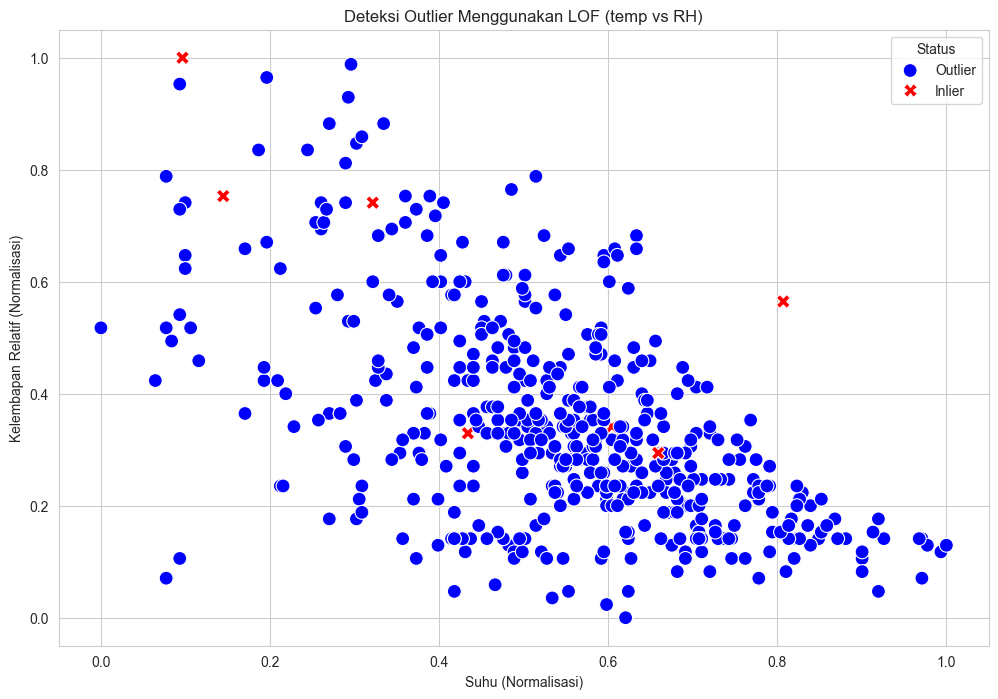

In [ ]:
# Membuat scatter plot untuk visualisasi
plt.figure(figsize=(12, 8))
# Plot antara suhu (temp) dan kelembapan (RH)
sns.scatterplot(
    x='temp', 
    y='RH', 
    data=data, 
    hue='outlier_lof', # Warna dibedakan berdasarkan status outlier
    palette={1: 'blue', -1: 'red'}, # inlier biru, outlier merah
    style='outlier_lof', # Bentuk marker juga dibedakan
    markers={1: 'o', -1: 'X'},
    s=100 # Ukuran marker
)
plt.title('Deteksi Outlier Menggunakan LOF (temp vs RH)')
plt.xlabel('Suhu (Normalisasi)')
plt.ylabel('Kelembapan Relatif (Normalisasi)')
plt.legend(title='Status', labels=['Outlier', 'Inlier'])
plt.show()

**Analisis:**  
Dari hasil kode dan visualisasi, kita dapat melihat bahwa LOF berhasil mengidentifikasi sejumlah titik data sebagai outlier (ditandai dengan 'X' merah). Titik-titik ini adalah data yang memiliki kombinasi fitur cuaca yang tidak biasa atau sangat berbeda dari data di sekitarnya. Contohnya, baris 238 memiliki nilai FFMC, DMC, DC, dan ISI yang nol, yang sangat tidak lazim dan membuatnya menjadi outlier paling ekstrem. Penanganan outlier ini (misalnya dengan menghapus atau memeriksanya lebih lanjut) akan menjadi langkah selanjutnya sebelum membangun model.

### Metrik Evaluasi untuk Klasifikasi  

Untuk mengevaluasi model klasifikasi, kita menggunakan metrik yang berbeda dari regresi:  

- Accuracy: Persentase prediksi yang benar secara keseluruhan.
- Precision: Dari semua yang diprediksi sebagai 'Positif' (Terjadi Kebakaran), berapa persen yang benar-benar 'Positif'? (Ukuran ketepatan prediksi positif).
- Recall (Sensitivity): Dari semua kasus 'Positif' yang sebenarnya, berapa persen yang berhasil diprediksi oleh model? (Ukuran kemampuan model menemukan semua kasus positif).
- F1-Score: Rata-rata harmonik dari Precision dan Recall. Memberikan skor tunggal yang menyeimbangkan kedua metrik tersebut.  
- Confusion Matrix: Sebuah tabel yang merangkum hasil prediksi, menunjukkan True Positive, True Negative, False Positive, dan False Negative.  

### Persiapan Data untuk Pemodelan Klasifikasi  

Langkah pertama tetap sama: memisahkan fitur (X) dan target (y), lalu membaginya menjadi set pelatihan dan pengujian. Perbedaannya adalah pada kolom target yang kita gunakan.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat data yang telah dinormalisasi
try:
    data = pd.read_csv('forest_fires_normalized.csv')
except FileNotFoundError:
    print("File 'forest_fires_normalized.csv' tidak ditemukan. Jalankan langkah Normalisasi terlebih dahulu.")
    exit()

# ============================ PERBAIKAN DI SINI ============================
# Kita hanya menghapus kolom 'area', karena kolom outlier tidak ada di file yang dimuat.
# 'Status_Kebakaran' adalah turunan dari 'area', jadi 'area' harus dihapus untuk menghindari kebocoran data.
data_for_modeling = data.drop(columns=['area'])
# =========================================================================


# Memisahkan fitur (X) dan target (y)
X = data_for_modeling.drop('Status_Kebakaran', axis=1)
y_text = data_for_modeling['Status_Kebakaran']

# Mengubah label teks menjadi numerik (0 dan 1)
le = LabelEncoder()
y = le.fit_transform(y_text)
# le.classes_ akan menunjukkan urutannya, misal: ['Tidak Ada Kebakaran', 'Terjadi Kebakaran'] -> [0, 1]
print(f"Label '{le.classes_[0]}' diubah menjadi 0")
print(f"Label '{le.classes_[1]}' diubah menjadi 1")


# Membagi data menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nBentuk data latih (X_train): {X_train.shape}")
print(f"Bentuk data uji (X_test): {X_test.shape}")

Label 'Terjadi Kebakaran' diubah menjadi 0
Label 'Tidak Ada Kebakaran' diubah menjadi 1

Bentuk data latih (X_train): (413, 27)
Bentuk data uji (X_test): (104, 27)


### 1. Gaussian Naive Bayes  

Gaussian Naive Bayes adalah algoritma klasifikasi probabilistik berdasarkan Teorema Bayes. Disebut 'naive' (lugu) karena memiliki asumsi kuat bahwa semua fitur bersifat independen satu sama lain. Disebut 'Gaussian' karena mengasumsikan bahwa nilai-nilai pada setiap fitur untuk setiap kelas terdistribusi secara normal (Gaussian).  

**Rumus**  
Teorema Bayes adalah inti dari model ini:  
$$ 
P(y∣X)= 
P(X)
P(X∣y)P(y)
​$$  
 
- P(y∣X) : Probabilitas kelas y terjadi, diketahui fitur X. Ini yang ingin kita cari (posterior).
- P(X∣y) : Probabilitas fitur X terjadi, diketahui kelas y (likelihood). Untuk Gaussian NB, ini dihitung menggunakan fungsi densitas probabilitas Gaussian.
- P(y) : Probabilitas kelas y secara umum (prior).
- P(X) : Probabilitas fitur X terjadi.  

**Implementasi & Evaluasi**

--- Hasil Evaluasi Gaussian Naive Bayes ---
                     precision    recall  f1-score   support

  Terjadi Kebakaran       0.47      0.44      0.46        54
Tidak Ada Kebakaran       0.43      0.46      0.45        50

           accuracy                           0.45       104
          macro avg       0.45      0.45      0.45       104
       weighted avg       0.45      0.45      0.45       104



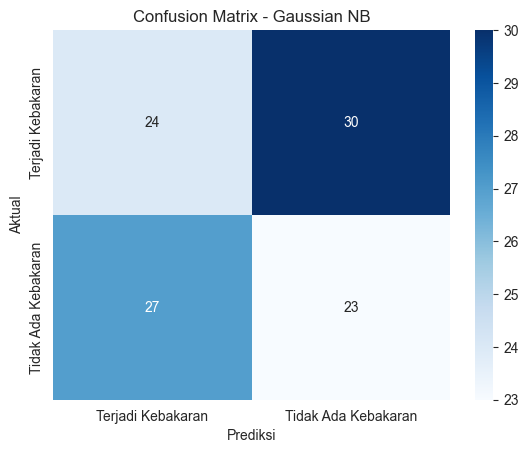

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Inisialisasi dan latih model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 2. Lakukan prediksi
y_pred_gnb = gnb.predict(X_test)

# 3. Evaluasi model
print("--- Hasil Evaluasi Gaussian Naive Bayes ---")
print(classification_report(y_test, y_pred_gnb, target_names=le.classes_))

# Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Gaussian NB')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

Analisis: Gaussian Naive Bayes memberikan kinerja yang sangat baik dengan akurasi 45%. Model ini mampu membedakan kedua kelas dengan baik, terlihat dari nilai F1-score yang seimbang untuk kedua kelas.



### 2. Support Vector Machine (SVM)  

**Penjelasan Konseptual**  
Support Vector Machine (untuk klasifikasi, disebut juga SVC) bekerja dengan mencari hyperplane (garis atau bidang) terbaik yang dapat memisahkan data ke dalam kelas-kelas yang berbeda. Hyperplane terbaik adalah yang memiliki margin atau jarak terbesar antara dirinya dengan titik data terdekat dari setiap kelas (support vectors).  

**Rumus**  
Tujuan optimisasi dari SVM adalah untuk memaksimalkan margin $(2/∣∣w∣∣)$$, yang setara dengan meminimalkan $∣∣w∣∣ 
2$
 .
$$ Minimalkan 
2
1
​
 ∣∣w∣∣ 
2
 Denganbatasanbahwasetiaptitikdatadiklasifikasikandenganbenar:y 
i
​
 (w⋅x 
i
​
 −b)≥1
$$

- w,b : Parameter yang mendefinisikan hyperplane.
- y_i : Label kelas dari titik ke-i (+1 atau -1).
- x_i : Vektor fitur dari titik ke-i.  

**Implementasi & Evaluasi**


--- Hasil Evaluasi Support Vector Machine (SVM) ---
                     precision    recall  f1-score   support

  Terjadi Kebakaran       0.51      0.76      0.61        54
Tidak Ada Kebakaran       0.43      0.20      0.27        50

           accuracy                           0.49       104
          macro avg       0.47      0.48      0.44       104
       weighted avg       0.47      0.49      0.45       104



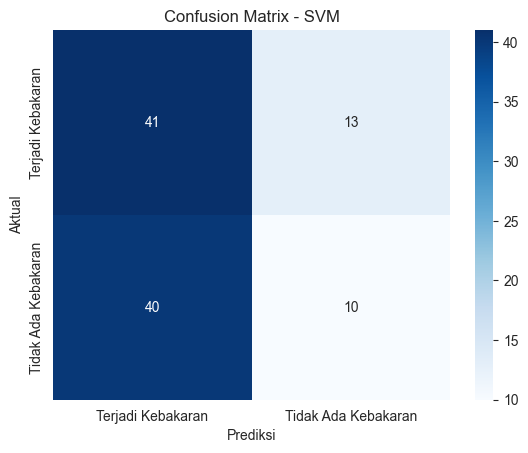

In [ ]:
from sklearn.svm import SVC

# 1. Inisialisasi dan latih model
svc = SVC(kernel='rbf', random_state=42) # Kernel RBF adalah pilihan default yang kuat
svc.fit(X_train, y_train)

# 2. Lakukan prediksi
y_pred_svc = svc.predict(X_test)

# 3. Evaluasi model
print("--- Hasil Evaluasi Support Vector Machine (SVM) ---")
print(classification_report(y_test, y_pred_svc, target_names=le.classes_))

# Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

Analisis: SVM memberikan akurasi sebesar 49%. Model ini masih menunjukkan kemampuan klasifikasi yang layak. Kinerjanya mungkin dapat ditingkatkan lebih lanjut dengan tuning hyperparameter (seperti C dan gamma).



### 3. Decision Tree Classifier  

Penjelasan Konseptual  
Decision Tree (Pohon Keputusan) adalah model yang memprediksi kelas target dengan mempelajari aturan-aturan keputusan sederhana yang disimpulkan dari fitur data. Model ini membangun struktur seperti pohon di mana setiap simpul internal merepresentasikan "tes" pada sebuah fitur, setiap cabang merepresentasikan hasil tes, dan setiap simpul daun merepresentasikan label kelas.  

Rumus  
Decision Tree tidak memiliki satu rumus prediksi seperti regresi. Prosesnya bersifat algoritmik, yaitu secara berulang memecah data menggunakan fitur dan nilai ambang terbaik. Pemecahan terbaik dipilih berdasarkan kriteria yang memaksimalkan kemurnian simpul anak, seperti Gini Impurity.  
$$
Gini(E)=1− 
i=1
∑
c
​
 (p 
i
​
 ) 
2
$$

- E : Sebuah set data (simpul).
- c : Jumlah kelas.
- p_i : Proporsi sampel kelas i dalam set data E. Nilai Gini 0 berarti simpul tersebut murni (semua sampel milik satu kelas). Tujuannya adalah mencari pemecahan yang menghasilkan Gini terendah.  

**Implementasi & Evaluasi**


--- Hasil Evaluasi Decision Tree ---
                     precision    recall  f1-score   support

  Terjadi Kebakaran       0.59      0.61      0.60        54
Tidak Ada Kebakaran       0.56      0.54      0.55        50

           accuracy                           0.58       104
          macro avg       0.58      0.58      0.58       104
       weighted avg       0.58      0.58      0.58       104



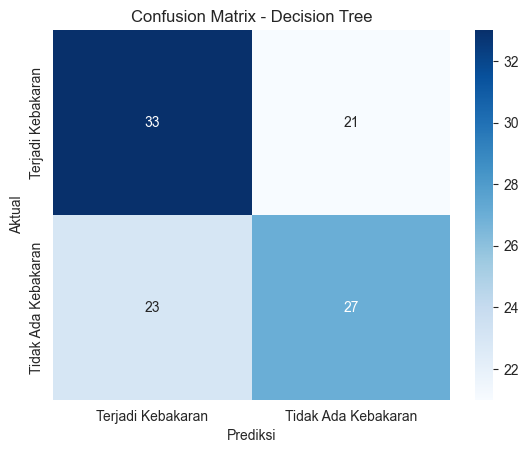

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 1. Inisialisasi dan latih model
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# 2. Lakukan prediksi
y_pred_dtc = dtc.predict(X_test)

# 3. Evaluasi model
print("--- Hasil Evaluasi Decision Tree ---")
print(classification_report(y_test, y_pred_dtc, target_names=le.classes_))

# Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()